### Gráficas de Tiempo Medido vs Tiempo Teórico

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_measured_vs_theoretical_time(csv_path: str, input_file_name: str):
    """
    Plots measured vs theoretical execution time (T1/p) for a specific input file.

    Parameters:
    - csv_path (str): Path to the CSV file.
    - input_file_name (str): Name of the input file (e.g., "5nodos.txt").

    Returns:
    - None (displays the plot).
    """
    # Load CSV
    df = pd.read_csv(csv_path)

    # Filter by the selected input file
    filtered_df = df[df["instance"] == input_file_name]

    if filtered_df.empty:
        raise ValueError(f"No data found for {input_file_name} in {csv_path}")

    # Group by number of threads and calculate mean execution time
    grouped = filtered_df.groupby("threads")["total_time_seconds"].mean().reset_index()

    # Get T1 (execution time with 1 thread)
    t1_row = grouped[grouped["threads"] == 1]
    if t1_row.empty:
        raise ValueError("No record found for threads=1 (T1)")

    t1 = float(t1_row["total_time_seconds"].values[0])
    grouped["theoretical_time"] = t1 / grouped["threads"]
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(grouped["threads"], grouped["total_time_seconds"], 'o-', label="Measured Time (Tp)")
    plt.plot(grouped["threads"], grouped["theoretical_time"], 's--', label="Theoretical Time (T1/p)")

    plt.title(f"Tiempo Medido vs Teórico \nFile: {input_file_name}")
    plt.xlabel("Número de Threads (p)")
    plt.ylabel("Tiempo de Ejecución (segundos)")
    plt.xticks(grouped["threads"])
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{input_file_name}_threads_vs_tiempo.png', dpi=300, bbox_inches='tight')
    plt.show()


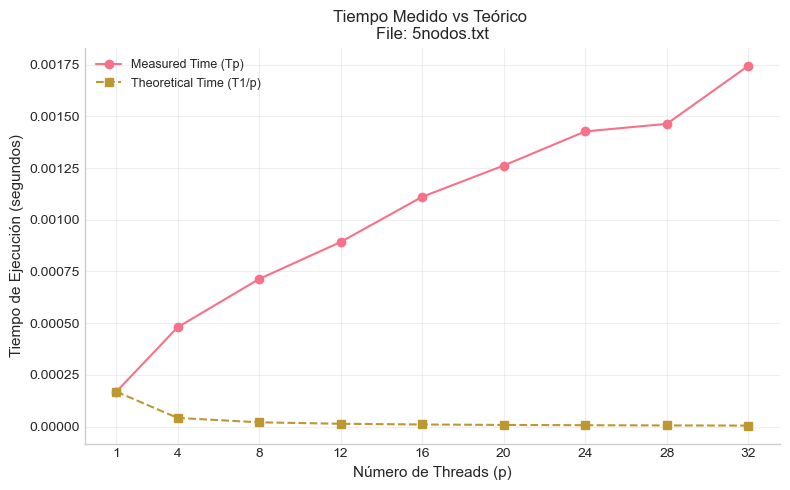

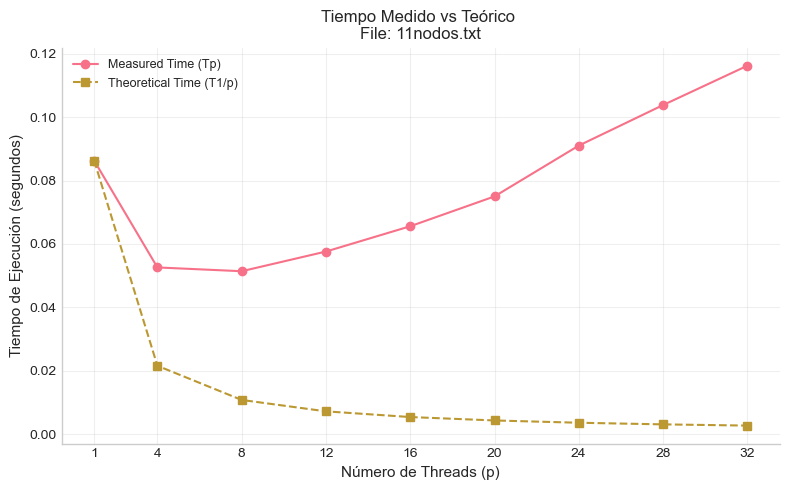

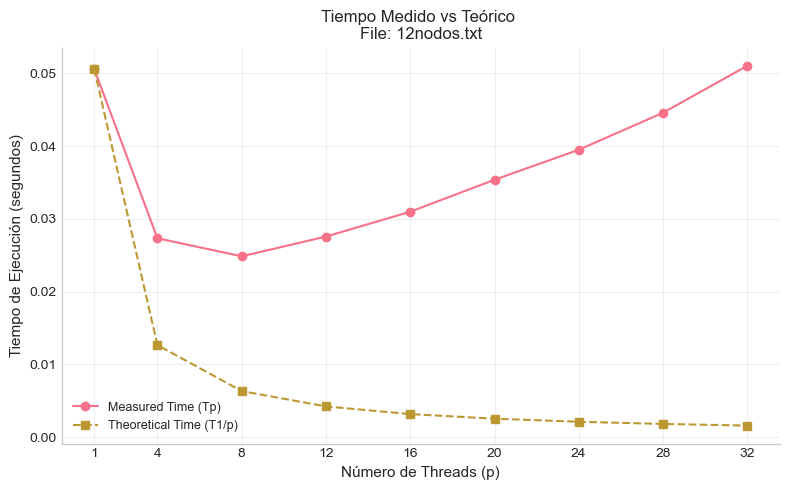

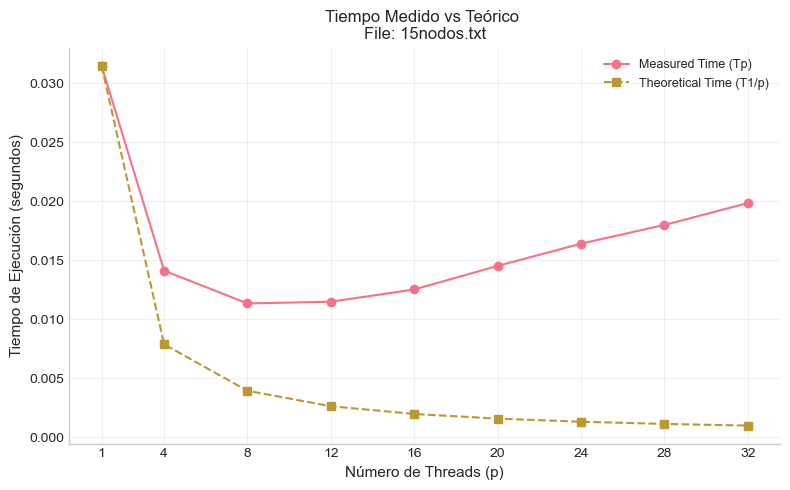

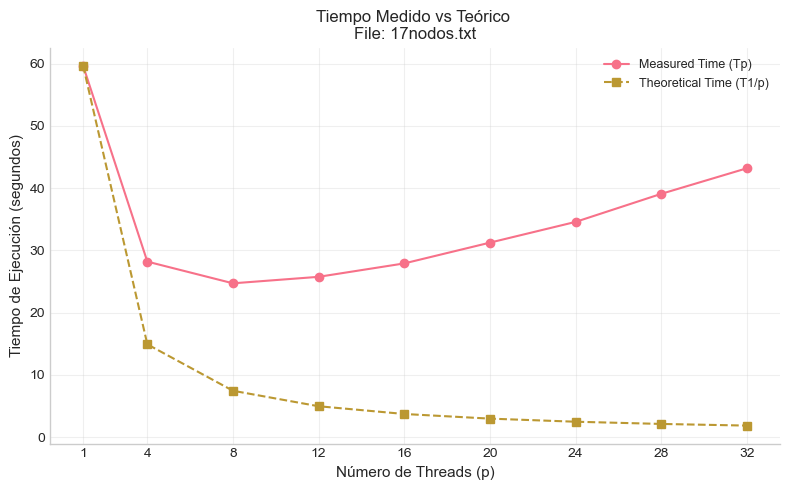

In [7]:
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="5nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="11nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="12nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="15nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="17nodos.txt")

### Speedup y Eficiencia

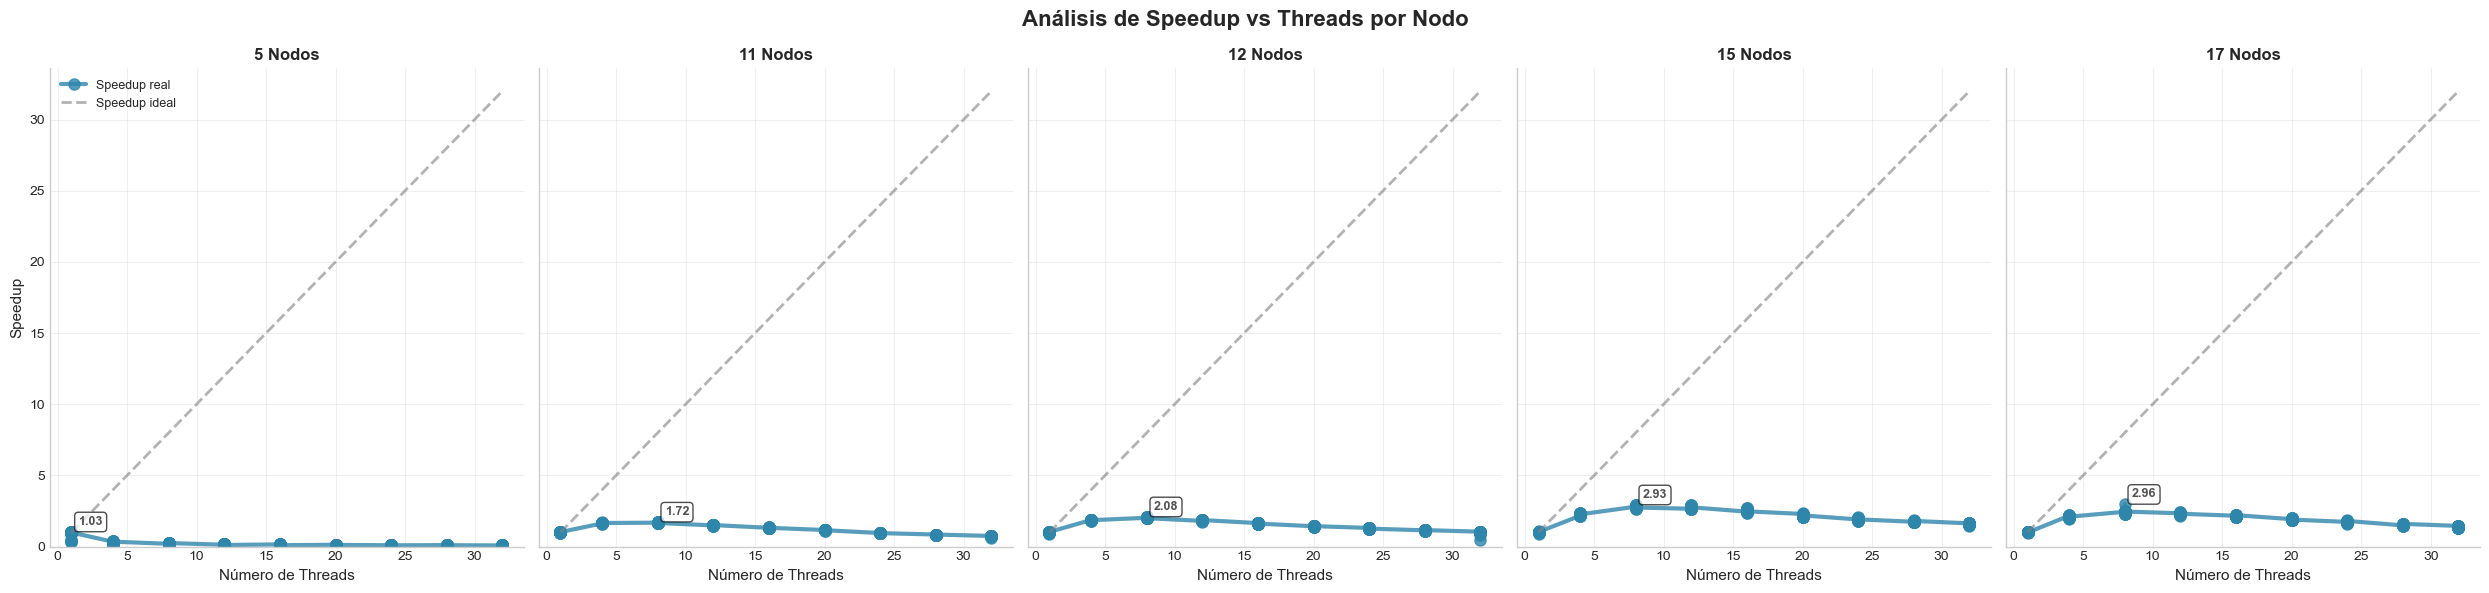

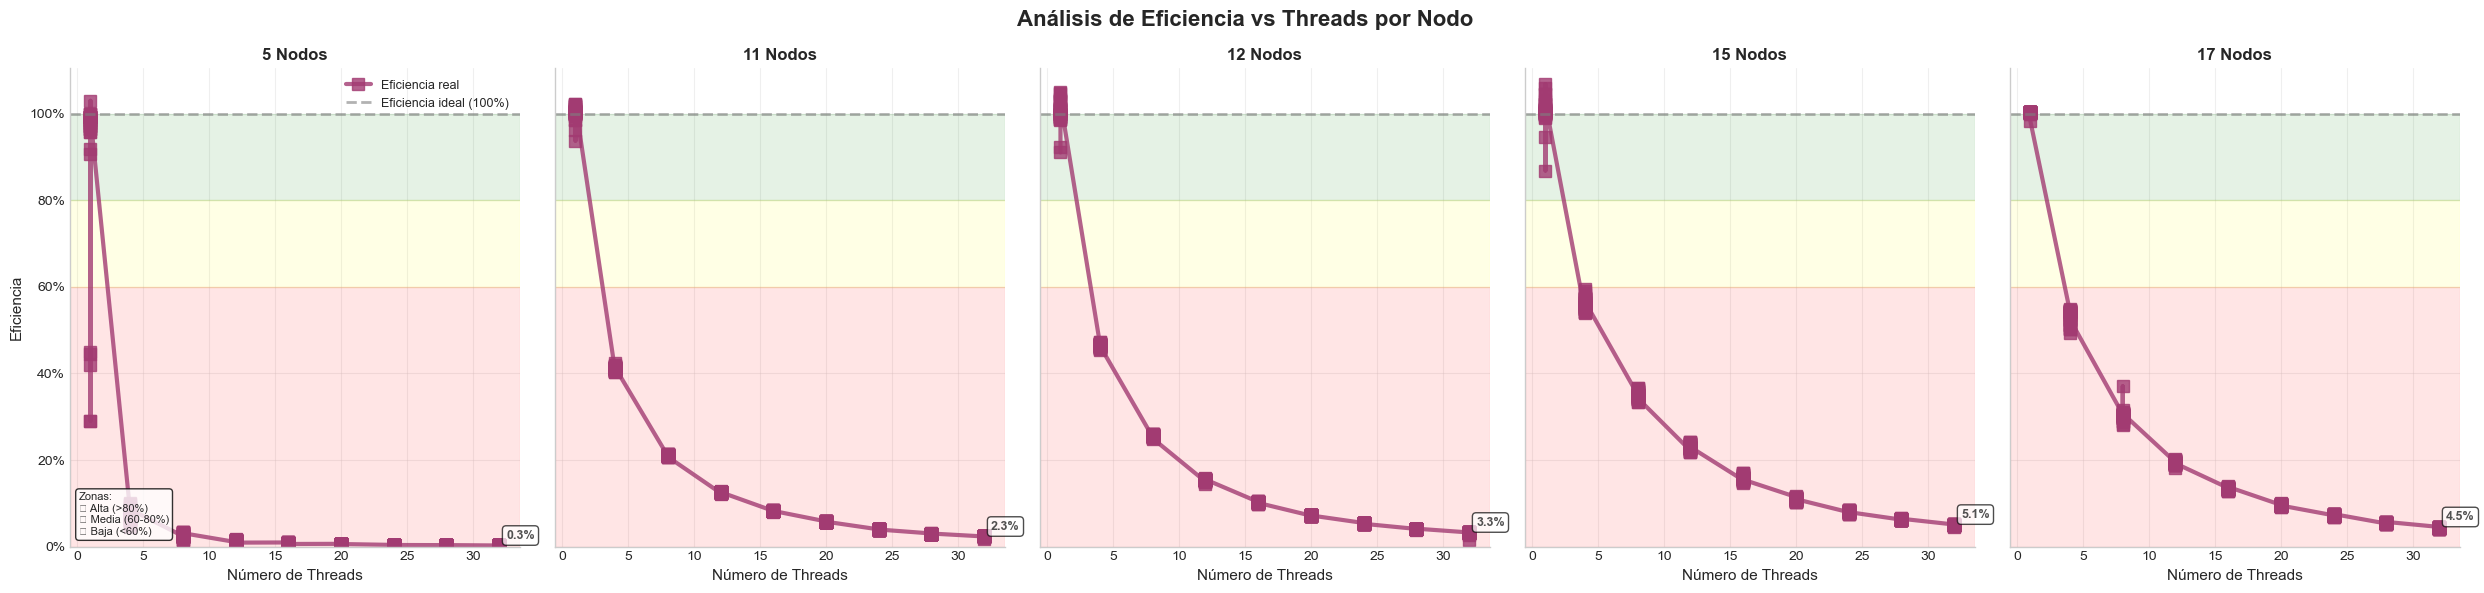

RESUMEN DEL ANÁLISIS

📊 NODO 5:
   Threads evaluados: [1, 4, 8, 12, 16, 20, 24, 28, 32]
   Máximo speedup: 1.03x con 1 threads
   Máxima eficiencia: 103.0% con 1 threads
   Eficiencia final: 0.2% con 32 threads

📊 NODO 11:
   Threads evaluados: [1, 4, 8, 12, 16, 20, 24, 28, 32]
   Máximo speedup: 1.72x con 8 threads
   Máxima eficiencia: 102.3% con 1 threads
   Eficiencia final: 2.3% con 32 threads

📊 NODO 12:
   Threads evaluados: [1, 4, 8, 12, 16, 20, 24, 28, 32]
   Máximo speedup: 2.08x con 8 threads
   Máxima eficiencia: 105.0% con 1 threads
   Eficiencia final: 3.2% con 32 threads

📊 NODO 15:
   Threads evaluados: [1, 4, 8, 12, 16, 20, 24, 28, 32]
   Máximo speedup: 2.93x con 8 threads
   Máxima eficiencia: 106.9% con 1 threads
   Eficiencia final: 4.9% con 32 threads

📊 NODO 17:
   Threads evaluados: [1, 4, 8, 12, 16, 20, 24, 28, 32]
   Máximo speedup: 2.96x con 8 threads
   Máxima eficiencia: 100.5% con 1 threads
   Eficiencia final: 4.5% con 32 threads


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo general
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Configurar parámetros globales de matplotlib
plt.rcParams.update({
    'font.size': 10,
    'font.family': 'Arial',
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 9,
    'figure.titlesize': 16,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3
})

# Cargar archivo CSV
df = pd.read_csv("output.csv")

# Asegurar que 'threads' es numérico
df['threads'] = pd.to_numeric(df['threads'], errors='coerce')
df['nodes'] = pd.to_numeric(df['nodes'], errors='coerce')

# Calcular el tiempo base secuencial por nodo (threads = 1)
base_times = df[df['threads'] == 1].set_index('nodes')['total_time_seconds'].to_dict()

# Agregar columnas de Speed-Up y Eficiencia
df['speedup'] = df.apply(lambda row: base_times.get(row['nodes'], None) / row['total_time_seconds'] 
                        if row['threads'] > 0 and base_times.get(row['nodes'], None) is not None 
                        else None, axis=1)
df['efficiency'] = df['speedup'] / df['threads']

# Obtener lista única de nodos y ordenarla
unique_nodes = sorted(df['nodes'].unique())
n_nodes = len(unique_nodes)

# Definir colores para los threads
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83', '#3B1F2B', '#228B22', '#FF6347']

# ---- GRAFICO 1: Speed-Up vs Threads por Nodo ----
fig, axes = plt.subplots(1, n_nodes, figsize=(5*n_nodes, 6), sharey=True)
if n_nodes == 1:
    axes = [axes]  # Asegurar que sea iterable

fig.suptitle('Análisis de Speedup vs Threads por Nodo', fontsize=16, fontweight='bold', y=0.98)

for i, node in enumerate(unique_nodes):
    ax = axes[i]
    node_data = df[df['nodes'] == node].copy()
    
    # Ordenar por threads para líneas conectadas
    node_data = node_data.sort_values('threads')
    
    # Graficar speedup
    ax.plot(node_data['threads'], node_data['speedup'], 
            marker='o', linewidth=3, markersize=8, 
            color=colors[0], alpha=0.8, label='Speedup real')
    
    # Línea de speedup ideal
    max_threads = node_data['threads'].max()
    ax.plot([1, max_threads], [1, max_threads], 
            '--', color='gray', alpha=0.6, linewidth=2, label='Speedup ideal')
    
    # Personalizar cada subplot
    ax.set_title(f'{int(node)} Nodos', fontsize=12, fontweight='bold')
    ax.set_xlabel('Número de Threads', fontsize=11)
    if i == 0:
        ax.set_ylabel('Speedup', fontsize=11)
        
    # Añadir anotaciones para valores máximos
    if not node_data['speedup'].isna().all():
        max_speedup_idx = node_data['speedup'].idxmax()
        max_speedup_row = node_data.loc[max_speedup_idx]
        ax.annotate(f'{max_speedup_row["speedup"]:.2f}', 
                    xy=(max_speedup_row['threads'], max_speedup_row['speedup']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
    
    # Cuadrícula y leyenda
    ax.grid(True, alpha=0.3)
    if i == 0:
        ax.legend(loc='upper left', fontsize=9)
    
    # Ajustar límites del eje Y
    ax.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('speedup_per_nodes.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# ---- GRAFICO 2: Eficiencia vs Threads por Nodo ----
fig, axes = plt.subplots(1, n_nodes, figsize=(5*n_nodes, 6), sharey=True)
if n_nodes == 1:
    axes = [axes]  # Asegurar que sea iterable

fig.suptitle('Análisis de Eficiencia vs Threads por Nodo', fontsize=16, fontweight='bold', y=0.98)

for i, node in enumerate(unique_nodes):
    ax = axes[i]
    node_data = df[df['nodes'] == node].copy()
    
    # Ordenar por threads para líneas conectadas
    node_data = node_data.sort_values('threads')
    
    # Graficar eficiencia
    ax.plot(node_data['threads'], node_data['efficiency'], 
            marker='s', linewidth=3, markersize=8, 
            color=colors[1], alpha=0.8, label='Eficiencia real')
    
    # Línea de eficiencia ideal (100%)
    ax.axhline(y=1, color='gray', linestyle='--', alpha=0.6, linewidth=2, label='Eficiencia ideal (100%)')
    
    # Zonas de eficiencia
    ax.axhspan(0.8, 1.0, alpha=0.1, color='green')
    ax.axhspan(0.6, 0.8, alpha=0.1, color='yellow')
    ax.axhspan(0, 0.6, alpha=0.1, color='red')
    
    # Personalizar cada subplot
    ax.set_title(f'{int(node)} Nodos', fontsize=12, fontweight='bold')
    ax.set_xlabel('Número de Threads', fontsize=11)
    if i == 0:
        ax.set_ylabel('Eficiencia', fontsize=11)
    
    # Formatear eje Y como porcentaje
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
    # Añadir anotaciones para valores en threads máximos
    if not node_data['efficiency'].isna().all():
        max_threads_row = node_data[node_data['threads'] == node_data['threads'].max()].iloc[0]
        ax.annotate(f'{max_threads_row["efficiency"]:.1%}', 
                    xy=(max_threads_row['threads'], max_threads_row['efficiency']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
    
    # Cuadrícula y leyenda
    ax.grid(True, alpha=0.3)
    if i == 0:
        ax.legend(loc='upper right', fontsize=9)
        # Añadir texto explicativo de las zonas
        ax.text(0.02, 0.02, 'Zonas:\n🟢 Alta (>80%)\n🟡 Media (60-80%)\n🔴 Baja (<60%)', 
                transform=ax.transAxes, fontsize=8, verticalalignment='bottom',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    # Ajustar límites del eje Y
    ax.set_ylim(0, max(1.1, node_data['efficiency'].max() * 1.1) if not node_data['efficiency'].isna().all() else 1.1)

plt.tight_layout()
plt.savefig('efficiency_per_nodes.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# ---- INFORMACIÓN ADICIONAL ----
print("="*60)
print("RESUMEN DEL ANÁLISIS")
print("="*60)

for node in unique_nodes:
    node_data = df[df['nodes'] == node]
    print(f"\n📊 NODO {int(node)}:")
    print(f"   Threads evaluados: {sorted(node_data['threads'].unique())}")
    
    if not node_data['speedup'].isna().all():
        max_speedup = node_data['speedup'].max()
        max_speedup_threads = node_data[node_data['speedup'] == max_speedup]['threads'].iloc[0]
        print(f"   Máximo speedup: {max_speedup:.2f}x con {int(max_speedup_threads)} threads")
    
    if not node_data['efficiency'].isna().all():
        max_eff = node_data['efficiency'].max()
        max_eff_threads = node_data[node_data['efficiency'] == max_eff]['threads'].iloc[0]
        print(f"   Máxima eficiencia: {max_eff:.1%} con {int(max_eff_threads)} threads")
        
        # Eficiencia con máximo threads
        max_threads_data = node_data[node_data['threads'] == node_data['threads'].max()]
        if not max_threads_data.empty:
            final_eff = max_threads_data['efficiency'].iloc[0]
            print(f"   Eficiencia final: {final_eff:.1%} con {int(node_data['threads'].max())} threads")

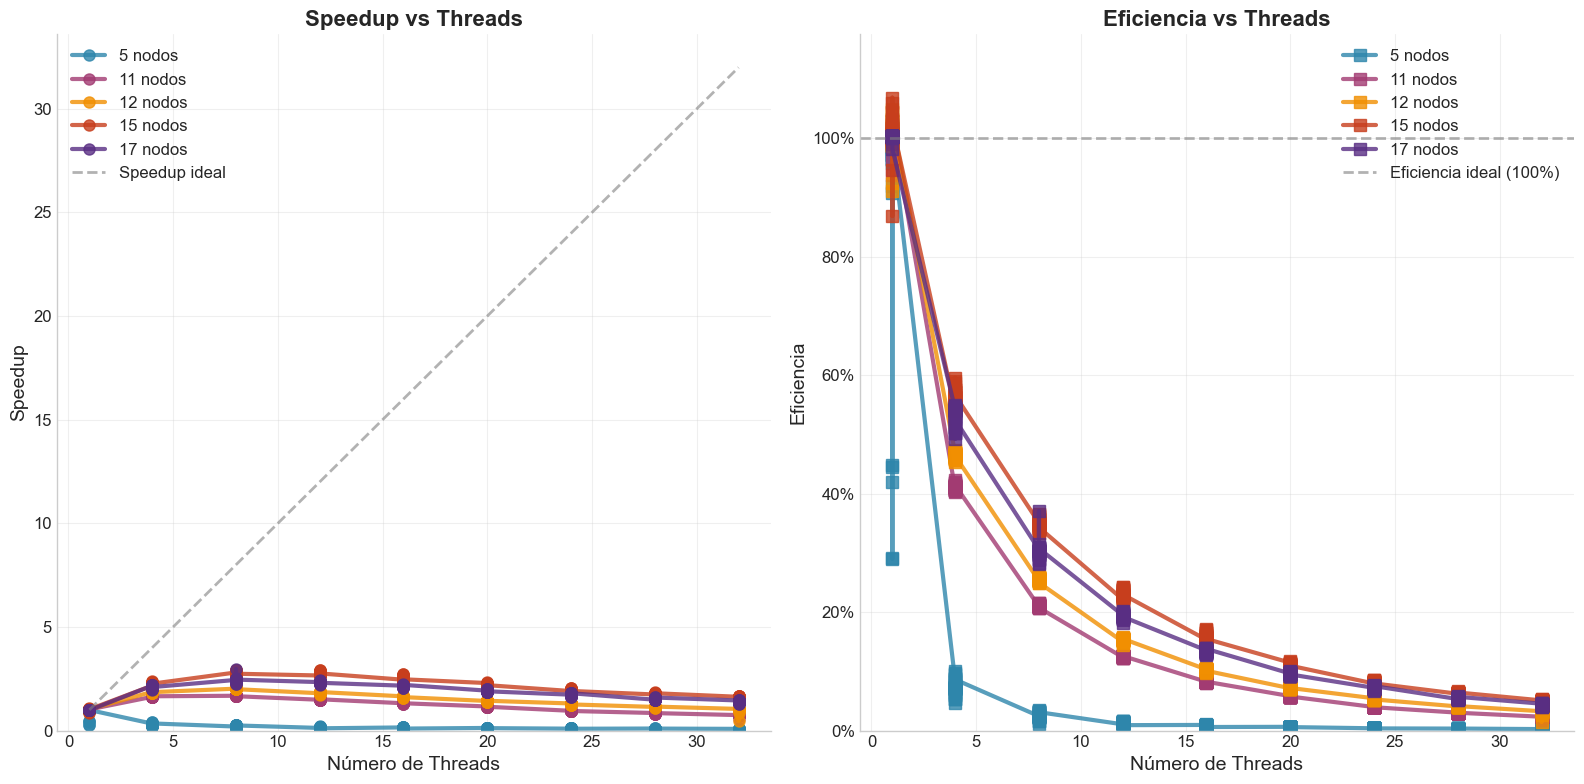

In [10]:
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3
})

# Cargar archivo CSV
df = pd.read_csv("output.csv")

# Asegurar que 'threads' y 'nodes' son numéricos
df['threads'] = pd.to_numeric(df['threads'], errors='coerce')
df['nodes'] = pd.to_numeric(df['nodes'], errors='coerce')

# Calcular el tiempo base secuencial por nodo (threads = 1)
base_times = df[df['threads'] == 1].set_index('nodes')['total_time_seconds'].to_dict()

# Agregar columnas de Speed-Up y Eficiencia
df['speedup'] = df.apply(lambda row: base_times.get(row['nodes'], None) / row['total_time_seconds'] 
                        if row['threads'] > 0 and base_times.get(row['nodes'], None) is not None 
                        else None, axis=1)
df['efficiency'] = df['speedup'] / df['threads']

# Obtener lista única de nodos y ordenarla
unique_nodes = sorted(df['nodes'].unique())

# Definir colores personalizados para cada nodo
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83', '#3B1F2B', '#228B22', '#FF6347']

# ---- GRAFICO COMBINADO: Speed-Up y Eficiencia en 1 fila ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# SUBPLOT 1: Speed-Up vs Threads
for i, node in enumerate(unique_nodes):
    node_data = df[df['nodes'] == node].copy()
    node_data = node_data.sort_values('threads')
    
    ax1.plot(node_data['threads'], node_data['speedup'], 
             marker='o', linewidth=3, markersize=8, 
             color=colors[i % len(colors)], alpha=0.8, 
             label=f'{int(node)} nodos')

# Línea de speedup ideal
max_threads = df['threads'].max()
ax1.plot([1, max_threads], [1, max_threads], 
         '--', color='gray', alpha=0.6, linewidth=2, label='Speedup ideal')

# Personalizar subplot de speedup
ax1.set_title('Speedup vs Threads', fontsize=16, fontweight='bold')
ax1.set_xlabel('Número de Threads', fontsize=14)
ax1.set_ylabel('Speedup', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)

# SUBPLOT 2: Eficiencia vs Threads
for i, node in enumerate(unique_nodes):
    node_data = df[df['nodes'] == node].copy()
    node_data = node_data.sort_values('threads')
    
    ax2.plot(node_data['threads'], node_data['efficiency'], 
             marker='s', linewidth=3, markersize=8, 
             color=colors[i % len(colors)], alpha=0.8, 
             label=f'{int(node)} nodos')

# Línea de eficiencia ideal (100%)
ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.6, linewidth=2, label='Eficiencia ideal (100%)')

# Personalizar subplot de eficiencia
ax2.set_title('Eficiencia vs Threads', fontsize=16, fontweight='bold')
ax2.set_xlabel('Número de Threads', fontsize=14)
ax2.set_ylabel('Eficiencia', fontsize=14)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Ajustar límites del eje Y para eficiencia
max_efficiency = df['efficiency'].max() if not df['efficiency'].isna().all() else 1
ax2.set_ylim(0, max(1.1, max_efficiency * 1.1))

plt.tight_layout()
plt.show()


### Análisis de Distribución del Tiempo


1. Distribución del tiempo - Barras apiladas:


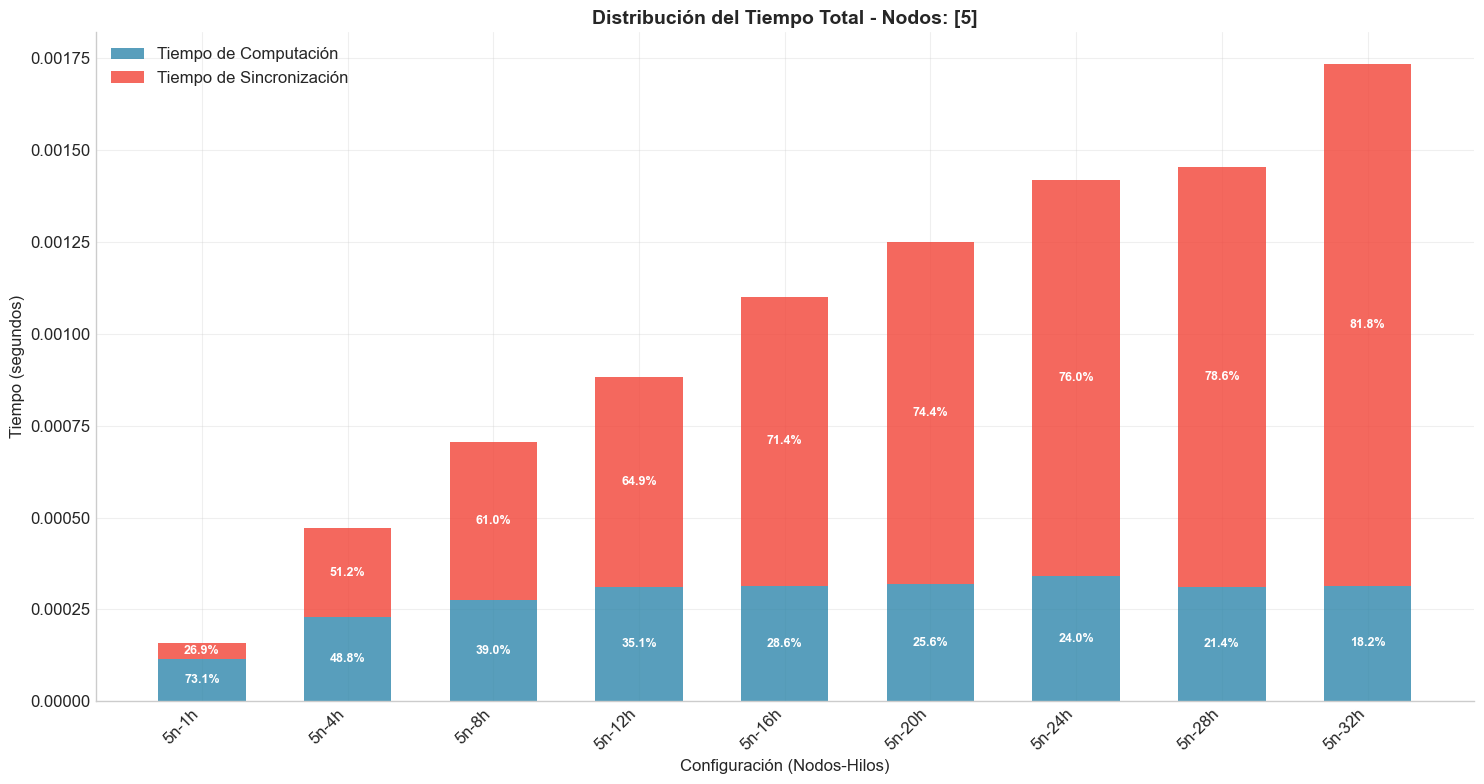


=== ANÁLISIS DE DISTRIBUCIÓN DEL TIEMPO ===
Configuraciones analizadas: 9
Nodos: [5]
Hilos: [1, 4, 8, 12, 16, 20, 24, 28, 32]

Tiempo total agregado:
  Computación: 0.002532s (27.6%)
  Sincronización: 0.006641s (72.4%)
  Total: 0.009173s

=== TABLA DETALLADA ===
 nodes  threads  total_time_seconds  computation_time_seconds  synchronization_time_seconds  comp_pct  sync_pct
     5        1            0.000169                  0.000116                      0.000043      68.5      25.2
     5        4            0.000476                  0.000230                      0.000241      48.2      50.6
     5        8            0.000714                  0.000275                      0.000431      38.6      60.5
     5       12            0.000893                  0.000310                      0.000573      34.7      64.2
     5       16            0.001111                  0.000315                      0.000786      28.3      70.7
     5       20            0.001262                  0.000320   

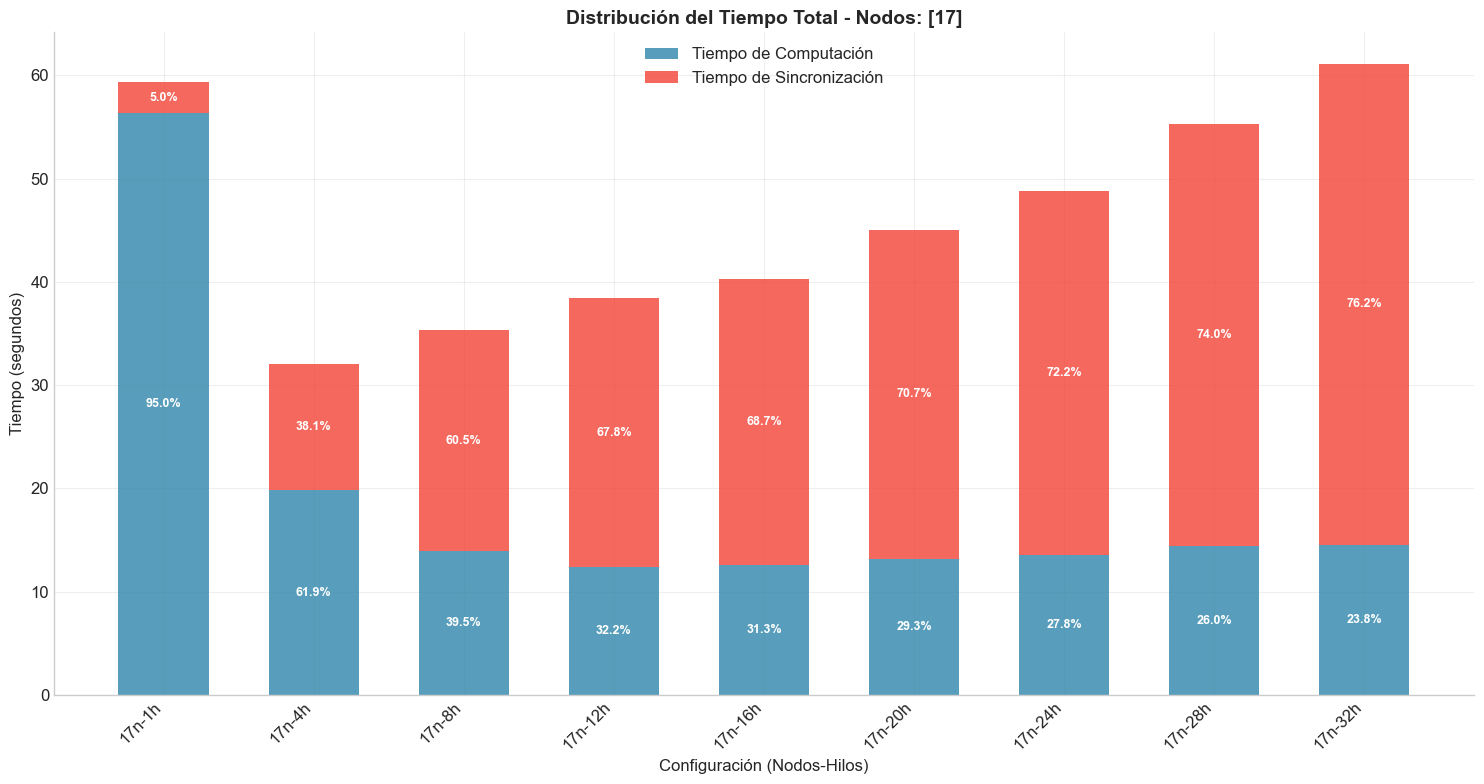


=== ANÁLISIS DE DISTRIBUCIÓN DEL TIEMPO ===
Configuraciones analizadas: 9
Nodos: [17]
Hilos: [1, 4, 8, 12, 16, 20, 24, 28, 32]

Tiempo total agregado:
  Computación: 170.815361s (41.1%)
  Sincronización: 244.827346s (58.9%)
  Total: 415.642707s

=== TABLA DETALLADA ===
 nodes  threads  total_time_seconds  computation_time_seconds  synchronization_time_seconds  comp_pct  sync_pct
    17        1           59.674012                 56.369053                      2.952763      94.5       4.9
    17        4           28.205285                 19.823693                     12.227298      70.3      43.4
    17        8           24.833405                 13.946660                     21.371575      56.2      86.1
    17       12           25.763625                 12.379705                     26.011591      48.1     101.0
    17       16           27.918068                 12.621662                     27.694091      45.2      99.2
    17       20           31.254112                 13.20

,nodes,threads,total_time_seconds,computation_time_seconds,synchronization_time_seconds,label
0,17,1,59.674012,56.369053,2.952763,17n-1h
1,17,4,28.205285,19.823693,12.227298,17n-4h
2,17,8,24.833405,13.946660,21.371575,17n-8h
3,17,12,25.763625,12.379705,26.011591,17n-12h
4,17,16,27.918068,12.621662,27.694091,17n-16h
5,17,20,31.254112,13.200036,31.851614,17n-20h
6,17,24,34.584714,13.560588,35.231742,17n-24h
7,17,28,39.089432,14.377943,40.914225,17n-28h
8,17,32,43.198714,14.536021,46.572448,17n-32h


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_time_distribution_bars(node_filter=None):
    """
    Grafica la distribución del tiempo total en barras apiladas
    mostrando tiempo de computación vs tiempo de sincronización
    
    Args:
        node_filter: Lista de números de nodos a incluir (ej: [5, 11, 17])
                    Si es None, muestra todos los nodos disponibles
    """
    # Cargar datos
    df = pd.read_csv('output.csv')
    
    # Limpiar datos (eliminar NaN)
    df_clean = df.dropna(subset=['parallel_efficiency_percent', 'sync_overhead_percent'])
    
    # Filtrar por nodos si se especifica
    if node_filter is not None:
        df_clean = df_clean[df_clean['nodes'].isin(node_filter)]
        title_suffix = f" - Nodos: {node_filter}"
    else:
        title_suffix = f" - Todos los nodos"
    
    # Verificar que hay datos después del filtro
    if len(df_clean) == 0:
        print("No hay datos válidos para los nodos especificados")
        return
    
    # Agrupar por nodos y hilos, promediar los tiempos
    grouped = df_clean.groupby(['nodes', 'threads']).agg({
        'total_time_seconds': 'mean',
        'computation_time_seconds': 'mean',
        'synchronization_time_seconds': 'mean'
    }).reset_index()
    
    # Crear etiquetas para el eje X
    grouped['label'] = grouped['nodes'].astype(str) + 'n-' + grouped['threads'].astype(str) + 'h'
    
    # Configurar la gráfica
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Datos para las barras
    labels = grouped['label']
    comp_times = grouped['computation_time_seconds']
    sync_times = grouped['synchronization_time_seconds']
    
    # Posiciones de las barras
    x = np.arange(len(labels))
    width = 0.6
    
    # Crear barras apiladas
    bars1 = ax.bar(x, comp_times, width, label='Tiempo de Computación', 
                   color='#2E86AB', alpha=0.8)
    bars2 = ax.bar(x, sync_times, width, bottom=comp_times, 
                   label='Tiempo de Sincronización', color='#F24236', alpha=0.8)
    
    # Personalizar la gráfica
    ax.set_xlabel('Configuración (Nodos-Hilos)', fontsize=12)
    ax.set_ylabel('Tiempo (segundos)', fontsize=12)
    ax.set_title(f'Distribución del Tiempo Total{title_suffix}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    # Agregar valores en las barras
    for i, (comp, sync) in enumerate(zip(comp_times, sync_times)):
        total = comp + sync
        if total > 0:
            # Porcentaje de computación
            comp_pct = (comp / total) * 100
            # Porcentaje de sincronización
            sync_pct = (sync / total) * 100
            
            # Etiquetas en las barras
            if comp > 0:
                ax.text(i, comp/2, f'{comp_pct:.1f}%', ha='center', va='center', 
                       fontweight='bold', color='white', fontsize=9)
            if sync > 0:
                ax.text(i, comp + sync/2, f'{sync_pct:.1f}%', ha='center', va='center', 
                       fontweight='bold', color='white', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar información adicional
    print(f"\n=== ANÁLISIS DE DISTRIBUCIÓN DEL TIEMPO ===")
    print(f"Configuraciones analizadas: {len(grouped)}")
    print(f"Nodos: {sorted(grouped['nodes'].unique())}")
    print(f"Hilos: {sorted(grouped['threads'].unique())}")
    
    # Estadísticas generales
    total_comp = grouped['computation_time_seconds'].sum()
    total_sync = grouped['synchronization_time_seconds'].sum()
    total_time = total_comp + total_sync
    
    print(f"\nTiempo total agregado:")
    print(f"  Computación: {total_comp:.6f}s ({(total_comp/total_time*100):.1f}%)")
    print(f"  Sincronización: {total_sync:.6f}s ({(total_sync/total_time*100):.1f}%)")
    print(f"  Total: {total_time:.6f}s")
    
    # Tabla detallada
    print(f"\n=== TABLA DETALLADA ===")
    display_df = grouped.copy()
    display_df['comp_pct'] = (display_df['computation_time_seconds'] / 
                             display_df['total_time_seconds'] * 100).round(1)
    display_df['sync_pct'] = (display_df['synchronization_time_seconds'] / 
                             display_df['total_time_seconds'] * 100).round(1)
    
    print(display_df[['nodes', 'threads', 'total_time_seconds', 
                     'computation_time_seconds', 'synchronization_time_seconds',
                     'comp_pct', 'sync_pct']].to_string(index=False))
    
    return grouped

print("\n1. Distribución del tiempo - Barras apiladas:")
plot_time_distribution_bars([5])
plot_time_distribution_bars([17])